# II. Exploratory Data Analysis

Dataset: https://www.kaggle.com/malaydhami/ipl-2021-dataset

Questions:
    
1) Which team won most of the matches?
    
2) Which team won toss most of the time?
    
3) Where most of the matches had been played?
    
4) Who scored most runs in this season?
  
5) Who took most of the wickets in this season?
    
6) Who won Man of the Match award most of the times?
 
7) What was the highest score by any batsman?
    
8) Did toss affect Match result?

## Importing Necessary Libraries 📚

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mplcyberpunk
import matplotlib
matplotlib.rcParams["figure.dpi"] = 80
plt.style.use('cyberpunk')

## Loading Datasets

In [2]:
df_match = pd.read_csv("E:\Project\Webscrapping\Dataset\Matches.csv")
df_match.head()

,match_no,date,team1,team2,venue,toss,decision,winner,target,mom
0,1,09-04-2021,Mumbai,Bangalore,MA Chidambaram Stadium,Bangalore,field,Bangalore,wickets,Harshal Patel
1,2,10-04-2021,Chennai,Delhi,Wankhede Stadium,Delhi,field,Delhi,wickets,Shikhar Dhawan
2,3,11-04-2021,Hyderabad,Kolkata,MA Chidambaram Stadium,Hyderabad,field,Kolkata,runs,Nitish Rana
3,4,12-04-2021,Rajasthan,Punjab,Wankhede Stadium,Rajasthan,field,Punjab,runs,Sanju Samson
4,5,13-04-2021,Kolkata,Mumbai,MA Chidambaram Stadium,Kolkata,field,Mumbai,runs,Rahul Chahar


In [3]:
df_deliveries = pd.read_csv("E:\Project\Webscrapping\Dataset\Ball by Ball.csv")
df_deliveries.head()

,match_no,inning,over,ball,batsman,bowler,is_wicket,dismissal_type,fielder,batsman_run,extra_run,total_run,extra_type
0,1,1,0,1,Rohit Sharma,Mohammed Siraj,0,NaN,NaN,2,0,2,NaN
1,1,1,0,2,Rohit Sharma,Mohammed Siraj,0,NaN,NaN,0,0,0,NaN
2,1,1,0,3,Rohit Sharma,Mohammed Siraj,0,NaN,NaN,0,0,0,NaN
3,1,1,0,4,Rohit Sharma,Mohammed Siraj,0,NaN,NaN,2,0,2,NaN
4,1,1,0,5,Rohit Sharma,Mohammed Siraj,0,NaN,NaN,0,0,0,NaN


In [4]:
print(">> Matches")
print()
print("Shape:", df_match.shape)
print()
print(">> Deliveries")
print()
print("Shape:", df_deliveries.shape)

>> Matches

Shape: (60, 10)

>> Deliveries

Shape: (14412, 13)


In [5]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_no  60 non-null     int64 
 1   date      60 non-null     object
 2   team1     60 non-null     object
 3   team2     60 non-null     object
 4   venue     60 non-null     object
 5   toss      60 non-null     object
 6   decision  60 non-null     object
 7   winner    60 non-null     object
 8   target    60 non-null     object
 9   mom       60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


In [6]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_no        14412 non-null  int64 
 1   inning          14412 non-null  int64 
 2   over            14412 non-null  int64 
 3   ball            14412 non-null  int64 
 4   batsman         14412 non-null  object
 5   bowler          14412 non-null  object
 6   is_wicket       14412 non-null  int64 
 7   dismissal_type  715 non-null    object
 8   fielder         548 non-null    object
 9   batsman_run     14412 non-null  int64 
 10  extra_run       14412 non-null  int64 
 11  total_run       14412 non-null  int64 
 12  extra_type      711 non-null    object
dtypes: int64(8), object(5)
memory usage: 1.4+ MB


In [7]:
df_match['winner'] = df_match['winner'].apply(lambda x: x.strip())
df_match['toss'] = df_match['toss'].apply(lambda x: x.strip())

In [8]:
teams = {
         'Mumbai':'Mumbai Indians', 
         'Chennai':'Chennai Super Kings', 
         'Hyderabad': 'Sunrisers Hyderabad', 
         'Rajasthan': 'Rajasthan Royals', 
         'Kolkata': 'Kolkata Knight Riders', 
         'Punjab': 'Punjab Kings',
         'Delhi': 'Delhi Capitals', 
         'Bangalore': 'Royal Challengers Bangalore'
        }

df_match = df_match.replace(teams)

## Exploratory Data Analysis 📊

In [24]:
def get_countplot(df, xvar, plottitle):
    
    plt.figure(figsize=(12,5))
    fig = sns.countplot(data=df, x=xvar)
    fig.bar_label(fig.containers[0])
    plt.title(plottitle, fontdict = {'fontfamily':'Dubai',  'fontsize' : 22})
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontfamily='Dubai', fontsize=12, rotation=90)
    plt.yticks([])
    plt.show()
    
def get_barplot(df, xvar, yvar, plottitle):
    
    plt.figure(figsize=(12,5))
    fig = sns.barplot(data=df, x=xvar, y=yvar)
    fig.bar_label(fig.containers[0])
    plt.title(plottitle, fontdict = {'fontfamily':'Dubai',  'fontsize' : 22})
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontfamily='Dubai', fontsize=12, rotation=90)
    plt.yticks([])
    plt.show()

<span style="font-size:18px;font-family:Segoe UI;"><b> Q1. </b></span>

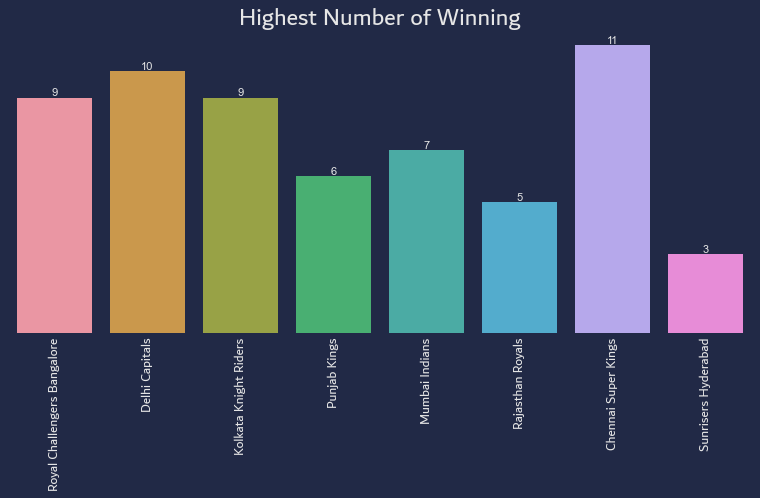

In [10]:
get_countplot(df_match, 'winner', 'Highest Number of Winning')

> <span style="font-size:15px;font-family:Segoe UI;"><b> Chennai Super Kings </b> won most of the matches. CSK win IPL 2021. So, this answer seems obvious. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q2. </b></span>

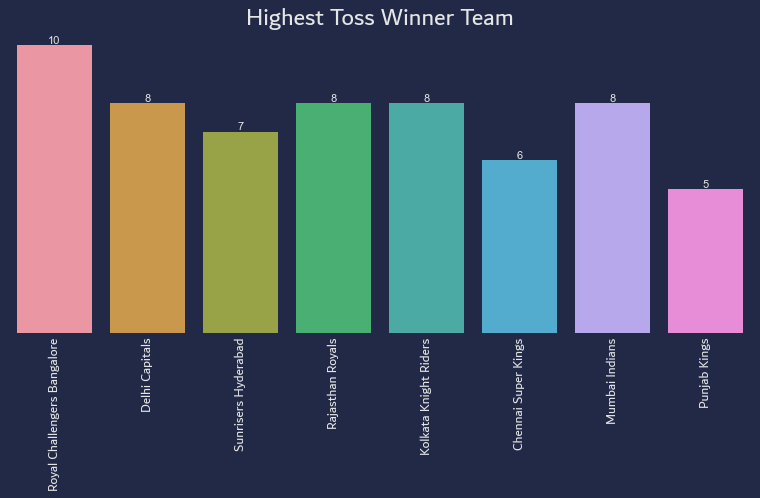

In [11]:
get_countplot(df_match, 'toss', 'Highest Toss Winner Team')

> <span style="font-size:15px;font-family:Segoe UI;"> This result is surprise for me. Virat Kohli won toss most of the times!!!. Yes, <b> Royal Challengers Banglore </b> is on top in this list. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q3. </b></span>

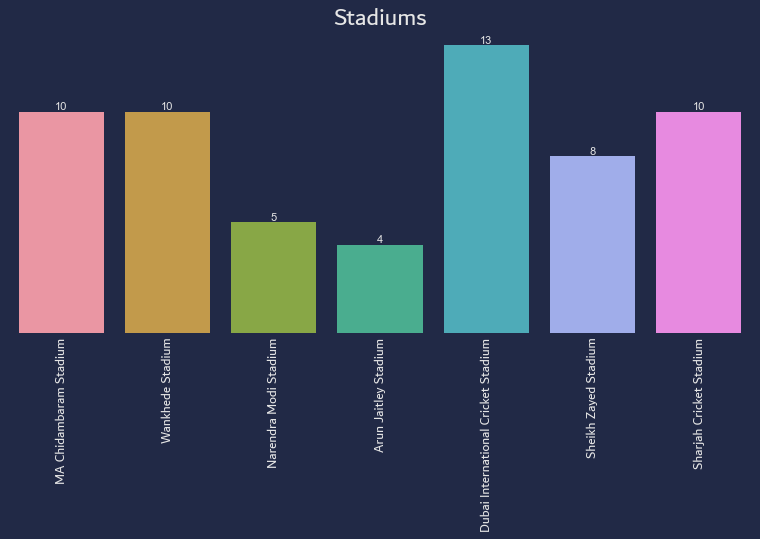

In [12]:
get_countplot(df_match, 'venue', 'Stadiums')

> <span style="font-size:15px;font-family:Segoe UI;"> Because of Covid-19 this season played in two phases. So, some are Indian stadiums and some are UAE's stadiums. Highest matches played in <b> Dubai International Cricket Stadium</b>. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q4. </b></span>

In [13]:
top10_batsman = df_deliveries.groupby('batsman').apply(lambda df: df['batsman_run'].sum()).sort_values(ascending=False).to_frame(name='Total Runs').head(10).reset_index()
top10_batsman

,batsman,Total Runs
0,RD Gaikwad,635
1,F du Plessis,634
2,KL Rahul,626
3,Shikhar Dhawan,587
4,GJ Maxwell,513
5,SV Samson,484
6,PP Shaw,480
7,Shubman Gill,478
8,MA Agarwal,441
9,Rishabh Pant,419


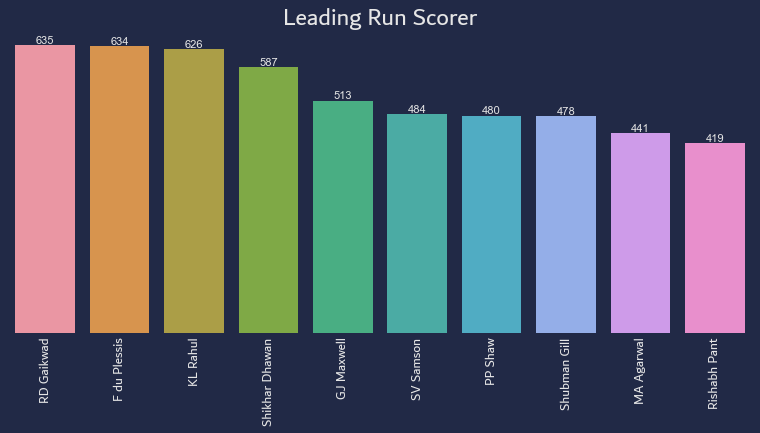

In [25]:
get_barplot(top10_batsman, 'batsman', 'Total Runs', 'Leading Run Scorer')

> <span style="font-size:15px;font-family:Segoe UI;"> Orange cap holder of this season is <b> Ruturaj Gaikwad</b>. There is not that much difference in runs between Ruturaj and Faf. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q5. </b></span>

In [15]:
df1 = df_deliveries[df_deliveries['dismissal_type'].isin(['caught', 'lbw', 'bowled', 'stumped'])]

top10_bowlers = df1.groupby('bowler').apply(lambda df: df['is_wicket'].sum()).sort_values(ascending=False).to_frame(name='Total Wickets').head(10).reset_index()
top10_bowlers

,bowler,Total Wickets
0,HV Patel,32
1,Avesh Khan,24
2,JJ Bumrah,21
3,Shardul Thakur,21
4,M Shami,19
5,Yuzvendra Chahal,18
6,Rashid Khan,18
7,Varun Chakravarthy,18
8,Arshdeep Singh,18
9,SP Narine,16


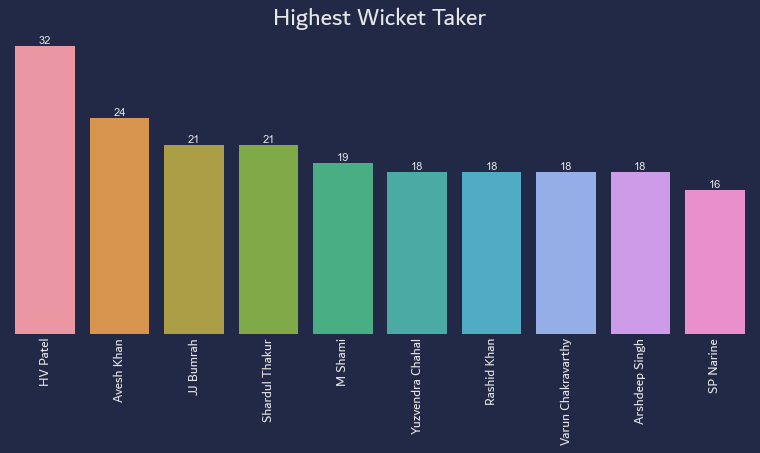

In [26]:
get_barplot(top10_bowlers, 'bowler', 'Total Wickets', 'Highest Wicket Taker')

> <span style="font-size:15px;font-family:Segoe UI;"> Purple cap holder of this season is <b>Harshal Patel</b>. This guy has maintained social distance from other bowlers during whole season!!! </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q6. </b></span>

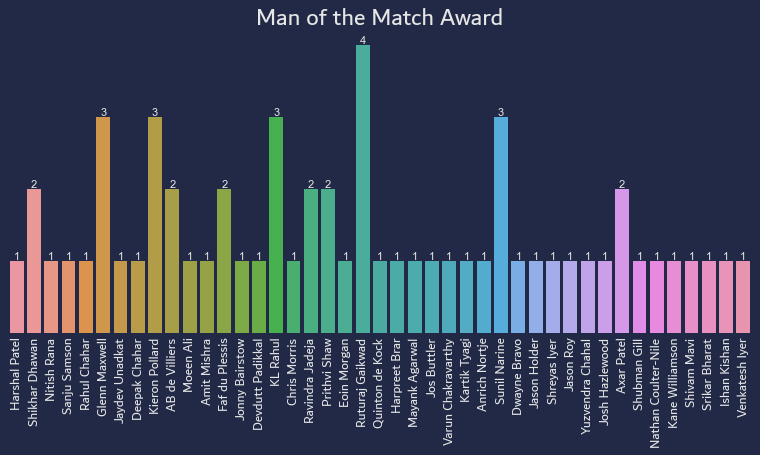

In [27]:
get_countplot(df_match, 'mom', 'Man of the Match Award')

> <span style="font-size:15px;font-family:Segoe UI;"> Again <b> Ruturaj Gaikwad</b> is on top of this list. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q7. </b></span>

In [18]:
batsman_score = pd.DataFrame(columns={'Match', 'Batsman', 'Runs'})

for match_id, match_details in df_deliveries.groupby('match_no'):
    for batsman, batsman_details in match_details.groupby('batsman'):   
        batsman_score = batsman_score.append({'Match': match_id, 'Batsman':batsman, 'Runs':batsman_details['batsman_run'].sum()}, ignore_index=True)

top10_highestscore = batsman_score.sort_values(by='Runs', ascending=False).head(10).reset_index(drop=True)
top10_highestscore

,Runs,Match,Batsman
0,124,29,Jos Buttler
1,119,4,SV Samson
2,102,16,D Padikkal
3,101,47,RD Gaikwad
4,99,28,MA Agarwal
5,98,54,KL Rahul
6,95,15,F du Plessis
7,92,10,Shikhar Dhawan
8,91,4,KL Rahul
9,91,26,KL Rahul


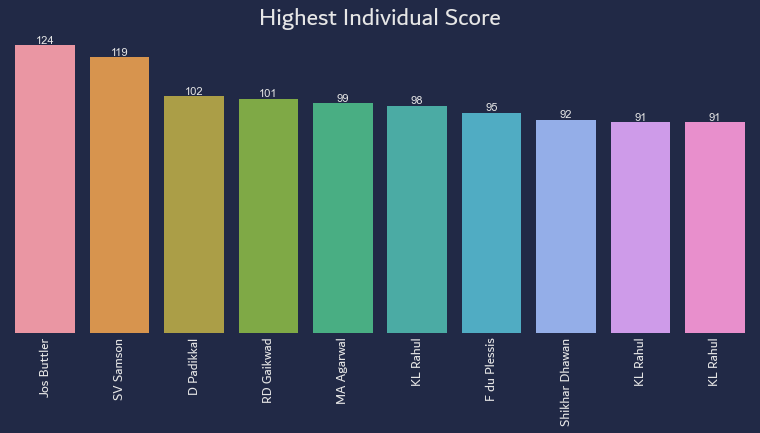

In [29]:
plt.figure(figsize=(12,5))
fig = sns.barplot(data=top10_highestscore, x=top10_highestscore.index, y='Runs')
fig.bar_label(fig.containers[0])
plt.title('Highest Individual Score', fontdict = {'fontfamily':'Dubai',  'fontsize' : 22})
plt.xlabel('')
plt.ylabel('')
plt.xticks(top10_highestscore.index, top10_highestscore['Batsman'], fontfamily='Dubai', fontsize=12, rotation=90)
plt.yticks([])
plt.show()

> <span style="font-size:15px;font-family:Segoe UI;"> Highest individual score during IPL 2021 is 124 and scored by <b> Jos Buttler</b>. </span>

> <span style="font-size:15px;font-family:Segoe UI;"> Total there are 4 hundreds in this season. </span>

<span style="font-size:18px;font-family:Segoe UI;"><b> Q8. </b></span>

In [20]:
def toss_winner(row):
    
    if row['team'] == row['toss']:
        row['toss'] = 'yes'
    else:
        row['toss'] = 'no'
        
    if row['team'] == row['winner']:
        row['winner'] = 'yes'
    else:
        row['winner'] = 'no'
        
    return row[['team', 'toss', 'winner']]

result1 = df_match[['team1', 'team2', 'toss', 'winner']]

result1 = result1.melt(id_vars=['toss', 'winner'], value_vars=['team1', 'team2'], ).drop(columns=['variable'])
result1.rename(columns={'value':'team'}, inplace=True)
result1 = result1.apply(lambda row: toss_winner(row), axis=1)
result1.head(5)

,team,toss,winner
0,Mumbai Indians,no,no
1,Chennai Super Kings,no,no
2,Sunrisers Hyderabad,yes,no
3,Rajasthan Royals,yes,no
4,Kolkata Knight Riders,yes,no


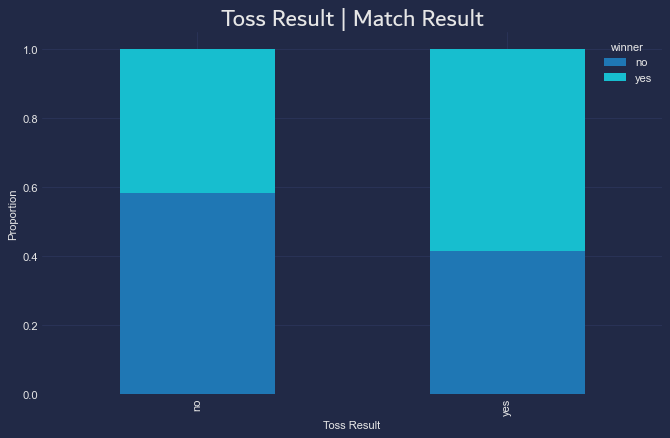

In [53]:
pd.crosstab(result1['toss'], result1['winner'], normalize="index").plot(kind='bar', 
                                                                        stacked=True, 
                                                                        colormap='tab10', 
                                                                        figsize=(10, 6))
plt.title('Toss Result | Match Result', fontdict = {'fontfamily':'Dubai',  'fontsize' : 22})
plt.xlabel("Toss Result")
plt.ylabel("Proportion")
plt.show()

> <span style="font-size:15px;font-family:Segoe UI;"> Toss winner team had high chances of winning the match.</span>

In [22]:
def decision_winner(row):
    
    if row['decision'] == 'field' and row['target'] == 'wickets':
        row['won'] = 'yes'
    elif row['decision'] == 'bat' and row['target'] == 'runs':
        row['won'] = 'yes'
    else:
        row['won'] = 'no'
    
    return row[['decision', 'won']]

result2 = df_match.apply(lambda r: decision_winner(r), axis=1)
result2.head(5)

,decision,won
0,field,yes
1,field,yes
2,field,no
3,field,no
4,field,no


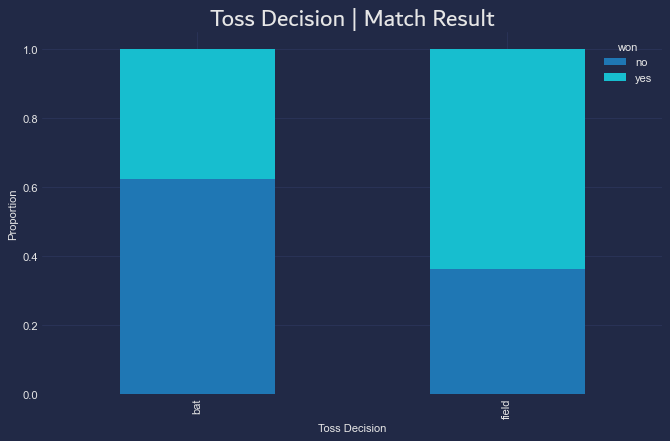

In [55]:
pd.crosstab(result2['decision'], result2['won'], normalize='index').plot(kind='bar', 
                                                                        stacked=True, 
                                                                        colormap='tab10', 
                                                                        figsize=(10, 6))
plt.title('Toss Decision | Match Result', fontdict = {'fontfamily':'Dubai',  'fontsize' : 22})
plt.xlabel("Toss Decision")
plt.ylabel("Proportion")
plt.show()

> <span style="font-size:15px;font-family:Segoe UI;"> Graph shows that win the toss choose bat first and win the match. So simple!!! </span>

<span style="font-size:30px;font-family:Segoe UI;"><b> Thanks!!! </b></span>